Import the required libraries

In [29]:
import matplotlib.pyplot as plt
import numpy as np , random , math

Define the objective function

In [30]:
def f(x1, x2):
    return x1 * math.sin(4 * x1 * math.pi) + x2 * math.sin(20 * x2 * math.pi) + 21.5

Define the population size, number of generations, mutation rate, and crossover rate

In [31]:
pop_size = 100 # Number of individuals in the population
num_gen = 50 # Number of generations
mut_rate = 0.001 # Probability of mutation
cross_rate = 0.8 # Probability of crossover

Define the lower and upper bounds of the variables

In [32]:
lb = [-3.0, 4.1] # Lower bounds
ub = [12.1, 5.8] # Upper bounds

In [33]:
# Initialize the population randomly within the bounds
pop = np.random.uniform(lb, ub, (pop_size, 2))

# Evaluate the fitness of the initial population
fitness = np.array([f(x1, x2) for x1, x2 in pop])

Final result: Best fitness = 37.5661709293675, Best solution = (11.125491964626502, 5.532427034887416)


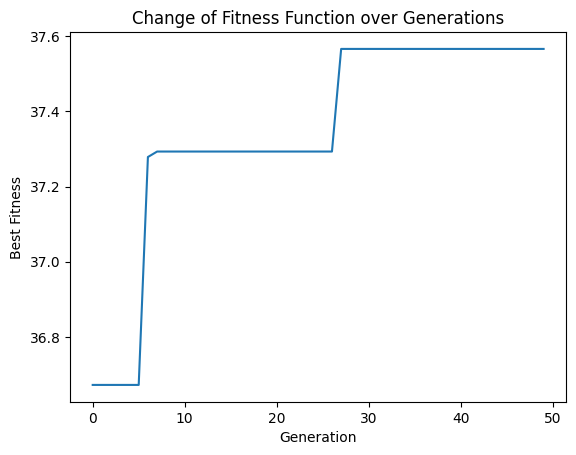

In [34]:
best_fitness_list = []

# Create an empty list to store the best fitness values
for gen in range(num_gen):
    # Select the parents using tournament selection
  parents = []
  for i in range(pop_size):
      # Randomly select k individuals from the population
      k = 25 # Tournament size
      candidates = random.sample(range(pop_size), k)
      # Select the best individual among the candidates
      best = max(candidates, key=lambda x: fitness[x])
      # Append the best individual to the parents list
      parents.append(pop[best])

  # Convert the parents list to a numpy array
  parents = np.array(parents)

  # Apply crossover to generate offspring
  offspring = []
  for i in range(0, pop_size, 2):
      # Randomly select two parents
      p1 = random.choice(parents)
      p2 = random.choice(parents)
      # Generate two offspring using uniform crossover
      if random.random() < cross_rate:
          alpha = np.random.uniform(0, 1, 2)
          o1 = alpha * p1 + (1 - alpha) * p2
          o2 = alpha * p2 + (1 - alpha) * p1
      else:
          o1 = p1.copy()
          o2 = p2.copy()
      # Append the offspring to the offspring list
      offspring.append(o1)
      offspring.append(o2)

  # Convert the offspring list to a numpy array
  offspring = np.array(offspring)

  # Apply mutation to introduce diversity
  for i in range(pop_size):
      # Randomly select an offspring
      o = offspring[i]
      # Mutate each variable with a given probability
      for j in range(2):
          if random.random() < mut_rate:
              # Add a random value from a normal distribution to the variable
              o[j] += np.random.normal(0, 0.1)
              # Clip the variable to be within the bounds
              o[j] = np.clip(o[j], lb[j], ub[j])

  # Evaluate the fitness of the offspring
  fitness = np.array([f(x1, x2) for x1, x2 in offspring])

  # Replace the population with the offspring
  pop = offspring.copy()

  # Find the best individual in the current population
  best_index = np.argmax(fitness)
  best_x1, best_x2 = pop[best_index]
  best_fitness = fitness[best_index]

  # Append the best fitness value to the list
  best_fitness_list.append(best_fitness)

  #print(f"Generation {gen+1}: Best fitness = {best_fitness}, Best solution = ({best_x1}, {best_x2})")

print(f"Final result: Best fitness = {best_fitness}, Best solution = ({best_x1}, {best_x2})")


# Plot the change of fitness function over generations
plt.plot(best_fitness_list)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Change of Fitness Function over Generations')
plt.show()